In [1]:
import pandas as pd
import numpy as np
import lightkurve as lk
import matplotlib.pyplot as plt

%run setup.py

In [2]:
plt.style.use('science')

In [3]:
df = pd.read_csv('hot_star.csv', dtype={'kic': str})

In [4]:
# Stellar tracks
Lcolnames = ["T11", "L11", "G11", "T12", "L12", "G12", "T13", "L13", "G13", "T14", "L14", "G14", "T15", "L15", "G15", "T16", "L16", "G16", "T17", "L17", "G17", "T18", "L18", "G18", "T19", "L19", "G19", "T20", "L20", "G20", "T21", "L21", "G21", "T22", "L22", "G22", "T23", "L23", "G23", "T24", "L24", "G24", "T25", "L25", "G25"]
Ltracks = pd.read_csv("../data/tracks/mesa10108_as09_opal_exp150_mlt180_D000_z140x071_orig.csv",  header=None, sep=" ", names=Lcolnames, skiprows=([0]))
msL = pd.DataFrame(data={"Tms": Ltracks.loc[0][0::3].values, "Lms": Ltracks.loc[0][1::3].values, "Gms": Ltracks.loc[0][2::3].values})

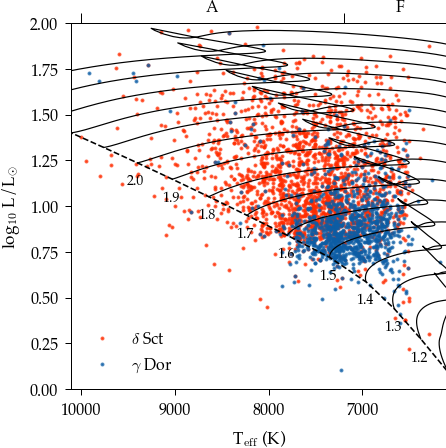

In [11]:
plt.figure(figsize=mnras_size(242.26653, square=True))

for n, mass in zip(np.arange(0,len(Lcolnames)/3), np.arange(1.1,2.7,0.1)):
    plt.plot(Ltracks.iloc[:,int(3*n+0)],Ltracks.iloc[:,int(3*n+1)],c='black',linewidth=0.6)
    if (mass > 1.2) & (mass < 2.1):
        plt.text(Ltracks.iloc[:,int(3*n+0)][0]+20, Ltracks.iloc[:,int(3*n+1)][0]-0.1, str(np.round(mass,2)), c='black',horizontalalignment='center',verticalalignment='center', fontsize=7)
plt.plot(msL['Tms'], msL['Lms'], c='black', linewidth=0.8, linestyle='dashed')
# give the plot frame the right parameters / aesthetics
plt.xlabel(r"T$_{\rm eff}$ (K)")
plt.ylabel(r"log$_{10}$ L/L$_{\odot}$")
plt.ylim(0.0,2.)
plt.xlim(6100,10100)
plt.gca().invert_xaxis()

m = df['dSct'] == True
plt.errorbar(df[m]['Teffi'], np.log10(df[m]['lum']), fmt='.', c='C3',elinewidth=0.7, markersize=2,zorder=1, alpha=0.7,
             label=r'$\delta$ Sct'
#             markeredgecolor='white'
            )
m = df['gdor'] == True
plt.errorbar(df[m]['Teffi'], np.log10(df[m]['lum']), fmt='.', c='C0',elinewidth=0.7, markersize=2,zorder=1, alpha=0.7,
             label=r'$\gamma$ Dor'
#             markeredgecolor='white'
            )

plt.legend(fontsize=8)

colors = np.array([
    [146,181,255],
    [162,192,255],
    [213,224,255],
    [249,245,255],
    [255,237,227],
    [255,218,181],
    [255,181,108]
]) / 255

classes = np.array([
    [30000, 50000],
    [10000,10500],
    [7200,10000],
    [6000,7200],
    [5200,6000],
    [3700,5200],
    [3000,3700]
])


ax2 = plt.twiny()
ax2.set_xlim(10100,6100)


# Major ticks
ticks2 = [3700,5200,6000,7200,10000]
ax2.set_xticks(ticks2)
ax2.set_xticklabels([])
ax2.tick_params(axis='x', which="major", length=5)
ax2.set_xlim(10100,6100)

# Minor ticks
ticks1 = np.average(classes, axis=1)
labs = ['O', 'B', 'A', 'F', 'G', 'K', 'M']
ax2.set_xticks(ticks1, minor=True)
ax2.set_xticklabels(labs, minor=True)
ax2.tick_params(axis='x', which="minor",length=0)
ax2.set_xlim(10100,6100)

plt.savefig(overleaf_path + 'HRD.pdf')